In [1]:
# Loading required libraries and initializing
from langdetect import DetectorFactory
from pandas import Series, DataFrame
from string import punctuation
from nltk.tokenize import word_tokenize

In [2]:
# Loading custom defined functions
from tokenization import tokenize_sentence_nltk, tokenize_treetagger
from util import read_file, flatten_list_of_list, read_folder#, clean_sentences
from util import pick_first_language, is_english_wp_p, spell_correct_tokens
from util import detect_language, postprocess_sentences, get_redundaunt_info
from util import filter_data, filter_senders, filter_recipients, search_patterns
from pos_tagging import run_treetagger_pos_tag_text
from modeling import apply_bigram_trigram_model, run_aff_prop_with_distances, run_kmeans
from nltk.stem import WordNetLemmatizer
from modeling import run_word2vec_model, run_lda_topic_model, build_logistic_regression
from visualizing import visualize_word2vec_model
from util import get_semantic_similarity, get_character_similarity
from lemmatization import lemmatize_treetagger
from util import run_treetagger, join_tokens, parse_date, is_spelled_correctly, parse_date_fast
from json import load

In [25]:
DetectorFactory.seed = 0

in_file = load(open("in_file.cfg", 'r'))
patterns_file = in_file["patterns_file"]
file_folder = in_file["file_folder"]
label = in_file["label"]
column = in_file["column"]
in_type = in_file["in_type"]
in_file = in_file["in_file"]
if file_folder == "file":
    strings = read_file(in_file, in_type = in_type)
    if in_type == "text":
        strings = tokenize_sentence_nltk(strings)
        strings = DataFrame(strings)[0]
    elif in_type == "html_chat":
        timestamp = strings[2]
        meta_data = strings[1]
        strings = strings[0]
        strings[label] = meta_data["Comment"]
        labels = strings[label]
        strings = strings[col]
    else:
        if label in strings.columns:
            labels = strings[label]
        strings = strings[col]
else:
    print(in_type)
    strings = read_folder(folder = in_file, in_type = in_type)

patterns = Series([".*" + x + ".*" for x in open(patterns_file, 'r').readlines()])

# For html_chat:
# strings -> DataFrame; meta_data -> Series; timestamp -> Series

# For csv, html_email, enron_email:
# strings -> DataFrame

# For folder:
# Sames as file

# html_email and enron_email will have columns 'conversation' (string) and 'meta_data' (dictionary)

# html_chat will have columns "itemId", "messageType", "messageDirection", "case", "captureDate", "policyAction", "statusMarkDate", "status", "status_reviewer", "commentDate", "comment", "comment_reviewer", "participants", "timestamp", "language", "sender", "recipients", "subject", "conversation", "num_of_conversation_turns" and "messages"

enron_email
Enron/maildir/allen-p/all_documents/1
Enron/maildir/allen-p/all_documents/10
Enron/maildir/allen-p/all_documents/100
Enron/maildir/allen-p/all_documents/101
Enron/maildir/allen-p/all_documents/102
Enron/maildir/allen-p/all_documents/103
Enron/maildir/allen-p/all_documents/104
Enron/maildir/allen-p/all_documents/105
Enron/maildir/allen-p/all_documents/106
Enron/maildir/allen-p/all_documents/107
Enron/maildir/allen-p/all_documents/108
Enron/maildir/allen-p/all_documents/109
Enron/maildir/allen-p/all_documents/11
Enron/maildir/allen-p/all_documents/110
Enron/maildir/allen-p/all_documents/111
Enron/maildir/allen-p/all_documents/112
Enron/maildir/allen-p/all_documents/113
Enron/maildir/allen-p/all_documents/114
Enron/maildir/allen-p/all_documents/115
Enron/maildir/allen-p/all_documents/116
Enron/maildir/allen-p/all_documents/117
Enron/maildir/allen-p/all_documents/118
Enron/maildir/allen-p/all_documents/119
Enron/maildir/allen-p/all_documents/120
Enron/maildir/allen-p/all_docume

Enron/maildir/allen-p/all_documents/332
Enron/maildir/allen-p/all_documents/333
Enron/maildir/allen-p/all_documents/334
Enron/maildir/allen-p/all_documents/335
Enron/maildir/allen-p/all_documents/336
Enron/maildir/allen-p/all_documents/337
Enron/maildir/allen-p/all_documents/338
Enron/maildir/allen-p/all_documents/339
Enron/maildir/allen-p/all_documents/34
Enron/maildir/allen-p/all_documents/340
Enron/maildir/allen-p/all_documents/341
Enron/maildir/allen-p/all_documents/342
Enron/maildir/allen-p/all_documents/344
Enron/maildir/allen-p/all_documents/345
Enron/maildir/allen-p/all_documents/346
Enron/maildir/allen-p/all_documents/347
Enron/maildir/allen-p/all_documents/348
Enron/maildir/allen-p/all_documents/349
Enron/maildir/allen-p/all_documents/35
Enron/maildir/allen-p/all_documents/350
Enron/maildir/allen-p/all_documents/351
Enron/maildir/allen-p/all_documents/352
Enron/maildir/allen-p/all_documents/353
Enron/maildir/allen-p/all_documents/354
Enron/maildir/allen-p/all_documents/355
En

Enron/maildir/allen-p/all_documents/580
Enron/maildir/allen-p/all_documents/581
Enron/maildir/allen-p/all_documents/582
Enron/maildir/allen-p/all_documents/583
Enron/maildir/allen-p/all_documents/584
Enron/maildir/allen-p/all_documents/585
Enron/maildir/allen-p/all_documents/586
Enron/maildir/allen-p/all_documents/587
Enron/maildir/allen-p/all_documents/588
Enron/maildir/allen-p/all_documents/589
Enron/maildir/allen-p/all_documents/59
Enron/maildir/allen-p/all_documents/590
Enron/maildir/allen-p/all_documents/592
Enron/maildir/allen-p/all_documents/593
Enron/maildir/allen-p/all_documents/594
Enron/maildir/allen-p/all_documents/595
Enron/maildir/allen-p/all_documents/596
Enron/maildir/allen-p/all_documents/597
Enron/maildir/allen-p/all_documents/598
Enron/maildir/allen-p/all_documents/599
Enron/maildir/allen-p/all_documents/6
Enron/maildir/allen-p/all_documents/60
Enron/maildir/allen-p/all_documents/600
Enron/maildir/allen-p/all_documents/601
Enron/maildir/allen-p/all_documents/602
Enro

Enron/maildir/allen-p/deleted_items/213
Enron/maildir/allen-p/deleted_items/214
Enron/maildir/allen-p/deleted_items/215
Enron/maildir/allen-p/deleted_items/216
Enron/maildir/allen-p/deleted_items/218
Enron/maildir/allen-p/deleted_items/219
Enron/maildir/allen-p/deleted_items/22
Enron/maildir/allen-p/deleted_items/220
Enron/maildir/allen-p/deleted_items/225
Enron/maildir/allen-p/deleted_items/226
Enron/maildir/allen-p/deleted_items/227
Enron/maildir/allen-p/deleted_items/228
Enron/maildir/allen-p/deleted_items/229
Enron/maildir/allen-p/deleted_items/23
Enron/maildir/allen-p/deleted_items/230
Enron/maildir/allen-p/deleted_items/231
Enron/maildir/allen-p/deleted_items/232
Enron/maildir/allen-p/deleted_items/233
Enron/maildir/allen-p/deleted_items/234
Enron/maildir/allen-p/deleted_items/235
Enron/maildir/allen-p/deleted_items/236
Enron/maildir/allen-p/deleted_items/237
Enron/maildir/allen-p/deleted_items/238
Enron/maildir/allen-p/deleted_items/239
Enron/maildir/allen-p/deleted_items/24
Enr

Enron/maildir/allen-p/deleted_items/96
Enron/maildir/allen-p/deleted_items/98
Enron/maildir/allen-p/deleted_items/99
Enron/maildir/allen-p/discussion_threads/1
Enron/maildir/allen-p/discussion_threads/10
Enron/maildir/allen-p/discussion_threads/100
Enron/maildir/allen-p/discussion_threads/101
Enron/maildir/allen-p/discussion_threads/102
Enron/maildir/allen-p/discussion_threads/103
Enron/maildir/allen-p/discussion_threads/104
Enron/maildir/allen-p/discussion_threads/105
Enron/maildir/allen-p/discussion_threads/106
Enron/maildir/allen-p/discussion_threads/107
Enron/maildir/allen-p/discussion_threads/108
Enron/maildir/allen-p/discussion_threads/109
Enron/maildir/allen-p/discussion_threads/11
Enron/maildir/allen-p/discussion_threads/110
Enron/maildir/allen-p/discussion_threads/111
Enron/maildir/allen-p/discussion_threads/112
Enron/maildir/allen-p/discussion_threads/113
Enron/maildir/allen-p/discussion_threads/114
Enron/maildir/allen-p/discussion_threads/115
Enron/maildir/allen-p/discussion

Enron/maildir/allen-p/discussion_threads/437
Enron/maildir/allen-p/discussion_threads/438
Enron/maildir/allen-p/discussion_threads/439
Enron/maildir/allen-p/discussion_threads/44
Enron/maildir/allen-p/discussion_threads/440
Enron/maildir/allen-p/discussion_threads/441
Enron/maildir/allen-p/discussion_threads/442
Enron/maildir/allen-p/discussion_threads/443
Enron/maildir/allen-p/discussion_threads/444
Enron/maildir/allen-p/discussion_threads/445
Enron/maildir/allen-p/discussion_threads/446
Enron/maildir/allen-p/discussion_threads/447
Enron/maildir/allen-p/discussion_threads/448
Enron/maildir/allen-p/discussion_threads/449
Enron/maildir/allen-p/discussion_threads/45
Enron/maildir/allen-p/discussion_threads/450
Enron/maildir/allen-p/discussion_threads/451
Enron/maildir/allen-p/discussion_threads/452
Enron/maildir/allen-p/discussion_threads/453
Enron/maildir/allen-p/discussion_threads/454
Enron/maildir/allen-p/discussion_threads/455
Enron/maildir/allen-p/discussion_threads/456
Enron/maildi

Enron/maildir/allen-p/inbox/26
Enron/maildir/allen-p/inbox/27
Enron/maildir/allen-p/inbox/28
Enron/maildir/allen-p/inbox/29
Enron/maildir/allen-p/inbox/3
Enron/maildir/allen-p/inbox/30
Enron/maildir/allen-p/inbox/31
Enron/maildir/allen-p/inbox/32
Enron/maildir/allen-p/inbox/33
Enron/maildir/allen-p/inbox/34
Enron/maildir/allen-p/inbox/35
Enron/maildir/allen-p/inbox/36
Enron/maildir/allen-p/inbox/37
Enron/maildir/allen-p/inbox/38
Enron/maildir/allen-p/inbox/39
Enron/maildir/allen-p/inbox/4
Enron/maildir/allen-p/inbox/40
Enron/maildir/allen-p/inbox/41
Enron/maildir/allen-p/inbox/42
Enron/maildir/allen-p/inbox/43
Enron/maildir/allen-p/inbox/44
Enron/maildir/allen-p/inbox/45
Enron/maildir/allen-p/inbox/5
Enron/maildir/allen-p/inbox/6
Enron/maildir/allen-p/inbox/62
Enron/maildir/allen-p/inbox/63
Enron/maildir/allen-p/inbox/64
Enron/maildir/allen-p/inbox/65
Enron/maildir/allen-p/inbox/66
Enron/maildir/allen-p/inbox/67
Enron/maildir/allen-p/inbox/68
Enron/maildir/allen-p/inbox/69
Enron/maildi

Enron/maildir/allen-p/sent/251
Enron/maildir/allen-p/sent/252
Enron/maildir/allen-p/sent/253
Enron/maildir/allen-p/sent/254
Enron/maildir/allen-p/sent/255
Enron/maildir/allen-p/sent/256
Enron/maildir/allen-p/sent/257
Enron/maildir/allen-p/sent/258
Enron/maildir/allen-p/sent/259
Enron/maildir/allen-p/sent/26
Enron/maildir/allen-p/sent/260
Enron/maildir/allen-p/sent/261
Enron/maildir/allen-p/sent/262
Enron/maildir/allen-p/sent/263
Enron/maildir/allen-p/sent/264
Enron/maildir/allen-p/sent/265
Enron/maildir/allen-p/sent/266
Enron/maildir/allen-p/sent/267
Enron/maildir/allen-p/sent/268
Enron/maildir/allen-p/sent/269
Enron/maildir/allen-p/sent/27
Enron/maildir/allen-p/sent/270
Enron/maildir/allen-p/sent/271
Enron/maildir/allen-p/sent/272
Enron/maildir/allen-p/sent/273
Enron/maildir/allen-p/sent/274
Enron/maildir/allen-p/sent/275
Enron/maildir/allen-p/sent/276
Enron/maildir/allen-p/sent/277
Enron/maildir/allen-p/sent/278
Enron/maildir/allen-p/sent/279
Enron/maildir/allen-p/sent/28
Enron/maild

Enron/maildir/allen-p/sent/532
Enron/maildir/allen-p/sent/533
Enron/maildir/allen-p/sent/534
Enron/maildir/allen-p/sent/535
Enron/maildir/allen-p/sent/536
Enron/maildir/allen-p/sent/537
Enron/maildir/allen-p/sent/538
Enron/maildir/allen-p/sent/539
Enron/maildir/allen-p/sent/54
Enron/maildir/allen-p/sent/540
Enron/maildir/allen-p/sent/541
Enron/maildir/allen-p/sent/542
Enron/maildir/allen-p/sent/543
Enron/maildir/allen-p/sent/544
Enron/maildir/allen-p/sent/545
Enron/maildir/allen-p/sent/546
Enron/maildir/allen-p/sent/547
Enron/maildir/allen-p/sent/548
Enron/maildir/allen-p/sent/549
Enron/maildir/allen-p/sent/55
Enron/maildir/allen-p/sent/550
Enron/maildir/allen-p/sent/551
Enron/maildir/allen-p/sent/552
Enron/maildir/allen-p/sent/553
Enron/maildir/allen-p/sent/554
Enron/maildir/allen-p/sent/555
Enron/maildir/allen-p/sent/556
Enron/maildir/allen-p/sent/557
Enron/maildir/allen-p/sent/558
Enron/maildir/allen-p/sent/56
Enron/maildir/allen-p/sent/57
Enron/maildir/allen-p/sent/58
Enron/maildir

Enron/maildir/allen-p/sent_items/300
Enron/maildir/allen-p/sent_items/301
Enron/maildir/allen-p/sent_items/302
Enron/maildir/allen-p/sent_items/303
Enron/maildir/allen-p/sent_items/304
Enron/maildir/allen-p/sent_items/305
Enron/maildir/allen-p/sent_items/306
Enron/maildir/allen-p/sent_items/307
Enron/maildir/allen-p/sent_items/308
Enron/maildir/allen-p/sent_items/309
Enron/maildir/allen-p/sent_items/31
Enron/maildir/allen-p/sent_items/32
Enron/maildir/allen-p/sent_items/33
Enron/maildir/allen-p/sent_items/34
Enron/maildir/allen-p/sent_items/35
Enron/maildir/allen-p/sent_items/36
Enron/maildir/allen-p/sent_items/368
Enron/maildir/allen-p/sent_items/369
Enron/maildir/allen-p/sent_items/37
Enron/maildir/allen-p/sent_items/370
Enron/maildir/allen-p/sent_items/371
Enron/maildir/allen-p/sent_items/372
Enron/maildir/allen-p/sent_items/373
Enron/maildir/allen-p/sent_items/374
Enron/maildir/allen-p/sent_items/375
Enron/maildir/allen-p/sent_items/376
Enron/maildir/allen-p/sent_items/377
Enron/ma

Enron/maildir/allen-p/_sent_mail/254
Enron/maildir/allen-p/_sent_mail/255
Enron/maildir/allen-p/_sent_mail/256
Enron/maildir/allen-p/_sent_mail/257
Enron/maildir/allen-p/_sent_mail/258
Enron/maildir/allen-p/_sent_mail/259
Enron/maildir/allen-p/_sent_mail/26
Enron/maildir/allen-p/_sent_mail/260
Enron/maildir/allen-p/_sent_mail/261
Enron/maildir/allen-p/_sent_mail/262
Enron/maildir/allen-p/_sent_mail/263
Enron/maildir/allen-p/_sent_mail/264
Enron/maildir/allen-p/_sent_mail/265
Enron/maildir/allen-p/_sent_mail/266
Enron/maildir/allen-p/_sent_mail/267
Enron/maildir/allen-p/_sent_mail/268
Enron/maildir/allen-p/_sent_mail/269
Enron/maildir/allen-p/_sent_mail/27
Enron/maildir/allen-p/_sent_mail/270
Enron/maildir/allen-p/_sent_mail/271
Enron/maildir/allen-p/_sent_mail/272
Enron/maildir/allen-p/_sent_mail/273
Enron/maildir/allen-p/_sent_mail/274
Enron/maildir/allen-p/_sent_mail/275
Enron/maildir/allen-p/_sent_mail/276
Enron/maildir/allen-p/_sent_mail/277
Enron/maildir/allen-p/_sent_mail/278
Enr

Enron/maildir/allen-p/_sent_mail/467
Enron/maildir/allen-p/_sent_mail/468
Enron/maildir/allen-p/_sent_mail/469
Enron/maildir/allen-p/_sent_mail/47
Enron/maildir/allen-p/_sent_mail/470
Enron/maildir/allen-p/_sent_mail/471
Enron/maildir/allen-p/_sent_mail/472
Enron/maildir/allen-p/_sent_mail/473
Enron/maildir/allen-p/_sent_mail/474
Enron/maildir/allen-p/_sent_mail/475
Enron/maildir/allen-p/_sent_mail/476
Enron/maildir/allen-p/_sent_mail/477
Enron/maildir/allen-p/_sent_mail/478
Enron/maildir/allen-p/_sent_mail/479
Enron/maildir/allen-p/_sent_mail/48
Enron/maildir/allen-p/_sent_mail/480
Enron/maildir/allen-p/_sent_mail/481
Enron/maildir/allen-p/_sent_mail/482
Enron/maildir/allen-p/_sent_mail/483
Enron/maildir/allen-p/_sent_mail/484
Enron/maildir/allen-p/_sent_mail/485
Enron/maildir/allen-p/_sent_mail/486
Enron/maildir/allen-p/_sent_mail/487
Enron/maildir/allen-p/_sent_mail/488
Enron/maildir/allen-p/_sent_mail/489
Enron/maildir/allen-p/_sent_mail/49
Enron/maildir/allen-p/_sent_mail/490
Enro

In [4]:
strings.shape

(3494, 2)

In [26]:
if in_type == "html_email" or in_type == "enron_email":
    conv = strings["conversation"].apply(tokenize_sentence_nltk)
    strings = strings["meta_data"].apply(Series)
    strings["conversation"] = conv
    try:
        if strings.shape[0] < 100:
            strings["Sent"] = strings["Sent"].apply(parse_date)
        else:
            strings["Sent"] = strings["Sent"].apply(parse_date_fast)
    except:
        pass
    try:
        # 1900/01/01 00:00:00 is equivalent to NULL
        if strings.shape[0] < 100:
            strings["Date"] = strings["Date"].apply(parse_date) # This is time consuming function, but it is robust
        else:
            strings["Date"] = strings["Date"].apply(parse_date_fast) # Fast but not so robust - especially with language
    except:
        pass

# For html_email, enron_email ->
# 1) tokenize the strings to create list of sentences
# 2) convert meta data from dictionary to columns
# 3) parse "Sent" and "Date" columns from string to datetime.datetime (1900-01-01 00:00:00 is equivalent to NULL)

In [27]:
if in_type == "html_chat":
    redundant = get_redundaunt_info(strings)
    total_redundant = redundant.sum()
    from re import findall
    unnecessary1 = strings['sender'].apply(lambda x: len(findall("^gg.*", x.lower())) > 0)
    unnecessary2 = strings['participants'].apply(lambda x: sum([len(findall("^gg.*|\;gg.*", y)) for y in x]) > 0)
    unnecessary = unnecessary1 | unnecessary2
    total_unnecessary = unnecessary.sum()
    # Deduplication
    strings = filter_senders(strings)
    strings.head()
    strings = filter_recipients(strings)
    strings.head()
    strings = filter_data(strings)
    strings.head()
    strings1 = strings.drop(['messages'], axis = 1).reset_index(drop = True)
    strings = strings['messages'].reset_index(drop = True)
    strings = strings.apply(lambda x: " ".join(x))

# For html_chat ->
# Remove unnecessary chat history: gg.* is the pattern for unwanted senders/participants
# Remove duplicate chats
# strings1 is a DataFrame with all columns except 'messages'
# strings is a Series (string) which is used for downstream NLP

<input>:6: DeprecationWarning: invalid escape sequence \;
<input>:6: DeprecationWarning: invalid escape sequence \;
<input>:6: DeprecationWarning: invalid escape sequence \;
<input>:6: DeprecationWarning: invalid escape sequence \;
<input>:6: DeprecationWarning: invalid escape sequence \;
<input>:6: DeprecationWarning: invalid escape sequence \;
<input>:6: DeprecationWarning: invalid escape sequence \;
<input>:6: DeprecationWarning: invalid escape sequence \;
<input>:6: DeprecationWarning: invalid escape sequence \;
<input>:6: DeprecationWarning: invalid escape sequence \;
<input>:6: DeprecationWarning: invalid escape sequence \;
<input>:6: DeprecationWarning: invalid escape sequence \;
<input>:6: DeprecationWarning: invalid escape sequence \;
<input>:6: DeprecationWarning: invalid escape sequence \;
<input>:6: DeprecationWarning: invalid escape sequence \;
<input>:6: DeprecationWarning: invalid escape sequence \;
<input>:6: DeprecationWarning: invalid escape sequence \;
<input>:6: Dep

In [28]:
strings.head()

,Cc,ContentTransferEncoding,ContentType,Date,From,MessageID,MimeVersion,Sent,Subject,To,XFileName,XFolder,XFrom,XOrigin,XTo,Xbcc,Xcc,conversation
0,NaN,7bit,text/plain; charset=us-ascii,2000-12-14 02:41:00,1.11913372.-2@multexinvestornetwork.com,<29790972.1075855665306.JavaMail.evans@thyme>,1.0,NaT,"December 14, 2000 - Bear Stearns' predictions ...",pallen@enron.com,pallen.nsf,Phillip_Allen_Dec2000\Notes Folders\All documents,Multex Investor <1.11913372.-2@multexinvestorn...,Allen-P,<pallen@enron.com>,,,[In today's Daily Update you'll find free repo...
1,NaN,quoted-printable,text/plain; charset=ANSI_X3.4-1968,2000-12-13 16:35:00,messenger@ecm.bloomberg.com,<21975671.1075855665520.JavaMail.evans@thyme>,1.0,NaT,Bloomberg Power Lines Report,NaN,pallen.nsf,Phillip_Allen_Dec2000\Notes Folders\All documents,"""Bloomberg.com"" <messenger@ecm.bloomberg.com>",Allen-P,(undisclosed-recipients),,,[Here is today's copy of Bloomberg Power Lines...
2,NaN,7bit,text/plain; charset=us-ascii,2000-10-09 14:16:00,phillip.allen@enron.com,<7452188.1075855667684.JavaMail.evans@thyme>,1.0,NaT,Consolidated positions: Issues & To Do list,keith.holst@enron.com,pallen.nsf,Phillip_Allen_Dec2000\Notes Folders\All documents,Phillip K Allen,Allen-P,Keith Holst,,,[---------------------- Forwarded by Phillip K...
3,NaN,7bit,text/plain; charset=us-ascii,2000-10-09 14:00:00,phillip.allen@enron.com,<23790115.1075855667708.JavaMail.evans@thyme>,1.0,NaT,Consolidated positions: Issues & To Do list,keith.holst@enron.com,pallen.nsf,Phillip_Allen_Dec2000\Notes Folders\All documents,Phillip K Allen,Allen-P,Keith Holst,,,[---------------------- Forwarded by Phillip K...
4,NaN,7bit,text/plain; charset=us-ascii,2000-10-05 13:26:00,phillip.allen@enron.com,<5860470.1075855667730.JavaMail.evans@thyme>,1.0,NaT,,david.delainey@enron.com,pallen.nsf,Phillip_Allen_Dec2000\Notes Folders\All documents,Phillip K Allen,Allen-P,David W Delainey,,,"[Dave, ., Here are the names of the west desk ..."


In [30]:
strings.groupby("From").apply(lambda x: x["conversation"].tolist()).reset_index(drop = False)

,From,0
0,"""Darrell Jack"" <djack@keyad.com <mailto:djack@...","[[Hey Phillip, ., I have gone into travel plan..."
1,"""Darrell Jack"" <djack@keyad.com>@ENRON","[[Hey Phillip, ., I have gone into travel plan..."
2,"""Greg Thorse"" \n. \n>","[[>Date: Sat, 29 Dec 2001 17:02:59 -0600 ., > ..."
3,"""Greg Thorse"" <gthorse@about-cis.com <mailto:g...","[[Phillip; ., These are just what I started wi..."
4,"""Greg Thorse"" <gthorse@keyad.com>@ENRON","[[Phillip, ., I need to get the contract for G..."
5,"""Greg Thorse"" <gthorse@keyad.com>@ENRON [mailt...","[[See Attachement ., - Phillip & Kieth Lender..."
6,"""Hargrove, Mac D [PVTC]"" <mac.d.hargrove@rssmb...","[[Phillip, ., This is our muni traders recomme..."
7,"""JEFF SMITH"" <jsmith@austintx.com <mailto:jsmi...","[[Three more deals in San Antonio ., - emilie ..."
8,"""JEFF SMITH"" <jsmith@austintx.com>@ENRON","[[Phillip, ., I am waiting to get info ., on t..."
9,"""Jeff Smith"" <jsmith@austintx.com <mailto:jsmi...",[[There are three other deals that I will fax ...


In [9]:
try:
    strings = strings["conversation"]
except:
    pass

strings = strings.apply(postprocess_sentences)

# For html_email and enron_email -> pick conversation column for downstream NLP

In [10]:
from re import sub
strings = strings.apply(lambda string: sub(pattern = "[\ ]{2,}", repl = " ", string = string))
strings = strings.apply(lambda string: sub(pattern = "[\ ]{1,}[\.]", repl = " .", string = string))
strings = strings.apply(lambda string: sub(pattern = "[\ \.]*[\.]", repl = " .", string = string))

In [11]:
strings.head()

0    In today's Daily Update you'll find free repor...
1    Here is today's copy of Bloomberg Power Lines ...
2    ---------------------- Forwarded by Phillip K ...
3    ---------------------- Forwarded by Phillip K ...
4    Dave, . Here are the names of the west desk me...
Name: conversation, dtype: object

In [12]:
# Identifying keyword hits
hits = strings.apply(lambda x: search_patterns(x, patterns))
hits['any'] = hits.apply(sum, axis = 0)
hit_strings = strings[hits['any'] > 0]

# Pattern matching -> store in 'hits' if any of the string patterns match

In [13]:
# Language filter for downstream NLP
languages = strings.apply(detect_language)

# Picking the language with highest probability
first_language = languages.apply(pick_first_language)

# Keeping only English text
english_only = first_language.apply(is_english_wp_p)
strings = strings[english_only]
# labels = labels[english_only].tolist()

# Retain only English text in strings
# labels is for supervised learning (future use)

In [14]:
# Processing English sentences:
# 1) Tokenization
sentences = strings.apply(tokenize_treetagger)
lengths = sentences.apply(len)

# new_labels = []
# for i in range(len(lengths)):
#     for j in range(lengths[i]):
#         new_labels.append(labels[i])
# new_labels = Series(new_labels)
# sentences1 = flatten_list_of_list(sentences)

# sentences -> list of (list for tokens) -> outer list: one list per sentence

In [15]:
sentences = sentences[lengths > 0]

# lengths -> used to remove sentences that are not tokenized

In [16]:
# 2) Run part-of-speech tagging on clean sentences
sentences1 = sentences.apply(lambda x: join_tokens(x))
pos = sentences1.apply(run_treetagger_pos_tag_text).apply(DataFrame)

# sentences1 -> tokens joined back into single string with '. ' separating sentences
# pos -> DataFrame with part-of-speech of sentences1

In [17]:
pos_to_keep = {'JJ', 'JJR', 'JJS', 'NN', 'NNS', 'NP', 'NPS', 'RB', 'RBR', 'RBS', 'RP', 'VV', 'VVD', 'VVG', 'VVN', 'VVP', 'VVZ'}
pos_new = pos.apply(lambda x: " ".join(x[x[1].apply(lambda y: y in pos_to_keep)][0]))
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer='word', min_df=1, stop_words='english', lowercase=True, token_pattern='[a-zA-Z0-9\-_]{2,}')
data_vectorized = vectorizer.fit_transform(pos_new)
from sklearn.decomposition import LatentDirichletAllocation
lda_model = LatentDirichletAllocation(n_topics=20, max_iter=10, learning_method='online', random_state=1, batch_size=16, evaluate_every=-1, n_jobs=-1)
lda_model.fit(data_vectorized)
from sklearn.model_selection import GridSearchCV
n_topics = [i+1 for i in range(9)] + [10, 15, 20, 25, 30, 40, 50, 75, 100]
search_params = {'n_components': n_topics, 'learning_decay': [.5, .7, .9]}
lda = LatentDirichletAllocation()
model = GridSearchCV(lda, param_grid=search_params)
model.fit(data_vectorized)
log_likelyhoods_5 = [round(gscore.mean_validation_score) for gscore in model.grid_scores_ if gscore.parameters['learning_decay']==0.5]
log_likelyhoods_7 = [round(gscore.mean_validation_score) for gscore in model.grid_scores_ if gscore.parameters['learning_decay']==0.7]
log_likelyhoods_9 = [round(gscore.mean_validation_score) for gscore in model.grid_scores_ if gscore.parameters['learning_decay']==0.9]
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.plot(n_topics, log_likelyhoods_5, label='0.5')
plt.plot(n_topics, log_likelyhoods_7, label='0.7')
plt.plot(n_topics, log_likelyhoods_9, label='0.9')
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelyhood Scores")
plt.legend(title='Learning decay', loc='best')
plt.show()

C:\Users\naveen.nathan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
C:\Users\naveen.nathan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:532: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
C:\Users\naveen.nathan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:532: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
C:\Users\naveen.nathan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:532: DeprecationWarning: The default value for 'lea

C:\Users\naveen.nathan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:532: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
C:\Users\naveen.nathan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:532: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
C:\Users\naveen.nathan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:532: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
C:\Users\naveen.nathan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.p

C:\Users\naveen.nathan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:532: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
C:\Users\naveen.nathan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:532: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
C:\Users\naveen.nathan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:532: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
C:\Users\naveen.nathan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.p

C:\Users\naveen.nathan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:532: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
C:\Users\naveen.nathan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:532: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
C:\Users\naveen.nathan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:532: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
C:\Users\naveen.nathan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.p

C:\Users\naveen.nathan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:532: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
C:\Users\naveen.nathan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:532: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
C:\Users\naveen.nathan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:532: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
C:\Users\naveen.nathan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.p

C:\Users\naveen.nathan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:532: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
C:\Users\naveen.nathan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:532: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
C:\Users\naveen.nathan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:532: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
C:\Users\naveen.nathan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.p

ValueError: x and y must have same first dimension, but have shapes (14,) and (18,)

In [18]:
n_topics = [i+1 for i in range(9)] + [10, 15, 20, 25, 30, 40, 50, 75, 100]

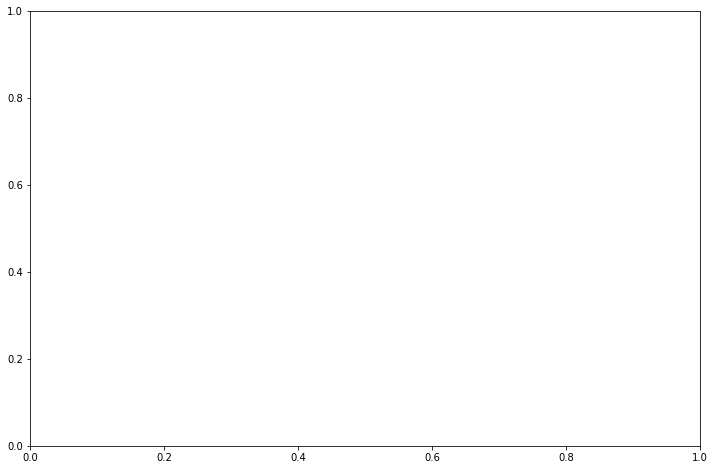

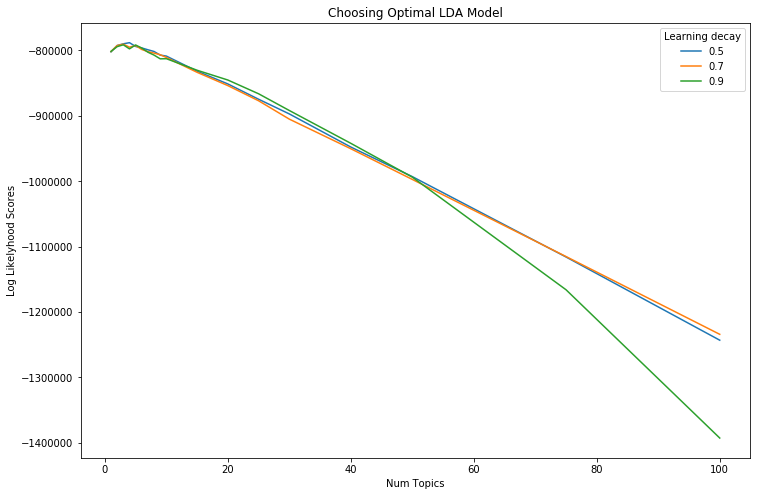

In [19]:
plt.figure(figsize=(12, 8))
plt.plot(n_topics, log_likelyhoods_5, label='0.5')
plt.plot(n_topics, log_likelyhoods_7, label='0.7')
plt.plot(n_topics, log_likelyhoods_9, label='0.9')
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelyhood Scores")
plt.legend(title='Learning decay', loc='best')
plt.show()

In [21]:
best_lda_model = model.best_estimator_
lda_output = best_lda_model.transform(data_vectorized)
from pandas import DataFrame
from numpy import round, argmax
# topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_topics)]
df_document_topic = DataFrame(round(lda_output, 2))
dominant_topic = argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
import pyLDAvis
pyLDAvis.enable_notebook()
import pyLDAvis.sklearn
panel = pyLDAvis.sklearn.prepare(best_lda_model, data_vectorized, vectorizer, mds='tsne')
panel

PreparedData(topic_coordinates=            Freq  cluster  topics           x           y
topic                                                    
2      28.701256        1       1 -120.576958 -227.147491
0      26.602637        1       2  154.163239 -192.059097
1      25.697357        1       3   34.338902 -346.985474
3      18.998750        1       4   -0.752480  -72.221367, topic_info=      Category         Freq          Term        Total  loglift  logprob
term                                                                    
4707   Default  9278.000000           ect  9278.000000  30.0000  30.0000
4999   Default  7574.000000         enron  7574.000000  29.0000  29.0000
6873   Default  5501.000000           hou  5501.000000  28.0000  28.0000
11879  Default  2906.000000  replaced-url  2906.000000  27.0000  27.0000
7069   Default  1544.000000         image  1544.000000  26.0000  26.0000
4752   Default  1635.000000           ees  1635.000000  25.0000  25.0000
3454   Default  1440.000000          corp  1440.000000  24.0000  24.0000
5012   Default   885.000000    enronxgate   885.000000  23.0000  23.0000
8457   Default   727.000000          loan   727.000000  22.0000  22.0000
10656  Default  3416.000000       phillip  3416.000000  21.0000  21.0000
1038   Default  2039.000000         allen  2039.000000  20.0000  20.0000
2328   Default   600.000000           buy   600.000000  19.0000  19.0000
3482   Default   599.000000          cost   599.000000  18.0000  18.0000
8458   Default   497.000000         loans   497.000000  17.0000  17.0000
3314   Default   496.000000  construction   496.000000  16.0000  16.0000
5846   Default  1000.000000     forwarded  1000.000000  15.0000  15.0000
8104   Default   492.000000          land   492.000000  14.0000  14.0000
10811  Default  1474.000000            pm  1474.000000  13.0000  13.0000
3048   Default  3827.000000           com  3827.000000  12.0000  12.0000
4109   Default   397.000000          desk   397.000000  11.0000  11.0000
2595   Default   964.000000            cc   964.000000  10.0000  10.0000
8526   Default   469.000000           lot   469.000000   9.0000   9.0000
7565   Default   390.000000          item   390.000000   8.0000   8.0000
15275  Default   451.000000          west   451.000000   7.0000   7.0000
6068   Default  1362.000000           gas  1362.000000   6.0000   6.0000
3488   Default   538.000000         costs   538.000000   5.0000   5.0000
10485  Default   383.000000           pdx   383.000000   4.0000   4.0000
12400  Default   398.000000          said   398.000000   3.0000   3.0000
11171  Default   536.000000       project   536.000000   2.0000   2.0000
15640  Default   340.000000         zdnet   340.000000   1.0000   1.0000
...        ...          ...           ...          ...      ...      ...
4227    Topic4   137.079287      director   154.346256   1.5422  -5.9965
8487    Topic4    87.630941        london    94.004457   1.5906  -6.4439
1754    Topic4   218.914400         basis   272.397140   1.4422  -5.5284
10686   Topic4   174.600919      physical   211.021988   1.4713  -5.7546
12461   Topic4    91.547573           sat   100.527274   1.5672  -6.4002
3853    Topic4   116.125768         deals   135.099650   1.5095  -6.1624
10898   Topic4   132.523761     positions   173.550325   1.3911  -6.0303
7776    Topic4    80.960382          juan    89.853037   1.5566  -6.5231
9540    Topic4   420.195089          need   857.614634   0.9474  -4.8764
3745    Topic4   197.292092         daily   317.827571   1.1840  -5.6324
7266    Topic4   344.760623   information   746.986899   0.8876  -5.0742
14233   Topic4   391.079519          time   906.124418   0.8205  -4.9482
10656   Topic4   929.663914       phillip  3416.218793   0.3593  -4.0823
10668   Topic4   143.711205         phone   216.263809   1.2521  -5.9493
14119   Topic4   210.238346         thank   406.640382   1.0011  -5.5688
14388   Topic4   181.233044       trading   321.619316   1.0872  -5.7173
4876    Topic4   288.571812     

In [22]:
# Topic-Keyword Matrix
df_topic_keywords = DataFrame(best_lda_model.components_)

# Assign Column and Index
df_topic_keywords.columns = vectorizer.get_feature_names()

# View
df_topic_keywords.head()

,-10,-based,-renovations,0-800-97-enron,00,00-may,000,000-square-foot,0005,0006,...,zivic,zone,zones,zoning,zool,zoolander,zoya,zub,zufferli,zuniga
0,2.026756,0.251161,2.678867,0.256839,0.251452,0.254899,0.250374,0.253888,0.250502,0.250372,...,0.250000,0.251391,0.251074,16.951660,0.250000,0.250000,0.258285,3.711139,0.251615,3.788487
1,0.250003,1.537626,0.250009,0.267582,174.195183,0.251817,1.894511,0.265454,0.774055,0.773200,...,0.250000,26.442178,4.866445,0.251289,0.251487,0.250672,0.252712,0.250007,0.254922,0.250003
2,0.250003,0.250031,0.250007,0.256320,0.252436,0.250003,0.250001,6.720290,0.250001,0.250002,...,3.921554,0.250413,0.250300,0.250077,0.250238,0.250064,0.255376,0.273382,9.856148,0.250667
3,0.250474,0.250410,0.250991,0.778370,0.250540,4.257279,0.250527,0.250001,0.250495,0.251479,...,0.250000,0.251955,0.251182,0.251103,0.773328,2.976703,3.263045,0.260683,0.251514,0.250004


In [23]:
from numpy import array
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=15)

In [24]:
df_topic_keywords = DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,phillip,loan,cost,com,loans,construction,land,costs,lot,project,allen,value,austin,know,cash
Topic 1,replaced-url,com,image,gas,buy,power,prices,click,item,said,zdnet,energy,market,new,today
Topic 2,ect,enron,hou,ees,com,corp,phillip,allen,pm,enronxgate,forwarded,cc,subject,e-mail,pdx
Topic 3,phillip,need,gas,pm,time,desk,west,information,email,3d,allen,patti,know,manager,position


In [ ]:
# 3) Spell correct - currently correct only disjoint words
lengths = pos.apply(len)
inc_sentences = sentences1[lengths == 0]
# inc_labels = new_labels[lengths == 0]
pos = pos[lengths > 0]
# labels = new_labels[lengths > 0]
sentence_tokens = pos.apply(spell_correct_tokens)

# lengths -> used to remove sentences for which pos is not tagged
# sentences_tokens -> combine words in pos if: a) word and adjacent word are incorrectly spelled, b) combination of words is correctly spelled

In [ ]:
# 4) Combine tokens to form bigrams and trigrams
# sentence_tokens = sentences.apply(tokenize_treetagger)
trigrams = apply_bigram_trigram_model(sentence_tokens)

# trigrams -> Series of lists: unigrams, bigram phrases (word1_word2) and trigram phrases (word1_word2_word3)

In [ ]:
# 5) Form the sentence back from tokens
sentences1 = ["".join([" "+lemmatize_treetagger(run_treetagger(i.lower())) if not i.startswith("'") and i not in punctuation
                       else i for i in tokens]).strip() for tokens in trigrams]
# labels = labels.tolist() + inc_labels.tolist()

# Join the sentences back
# sentences1 -> list of strings

In [ ]:
# 6) Write clean text to text file - one line per sentence
out_file = open("sample.txt", "w")
for sent in sentences1:
    out_file.write(sent.lower().replace("( ", "(").replace(" )", ")").replace("replaced-dns ", "").replace("replaced-dns", "")+"\n")

out_file.close()

# sentences1 written to text file "sample.txt" for word2vec and LDA models

In [ ]:
# 7) Run word2vec model and store word representations
model = run_word2vec_model("sample.txt")
model.wv.save_word2vec_format("big.w2v")

# Build word2vec model on "sample.txt" and save model to "big.w2v"

In [ ]:
# 8) Visualizing the word2vec model
visualize_word2vec_model(model)

# Visualize word2vec model in 2d using t-SNE

In [ ]:
# 9) Setting up the data for building logistic regression model
#df = zeros((len(sentences1), 100))
#for i, words in enumerate(trigrams):
#    for word in words:
#        try:
#            df[i] = df[i] + model[word]
#        except:
#            continue

#while(i<len(sentences1)):
#    i += 1
#
#df = DataFrame(df)
#df[label] = labels

# This is for building supervised learning model using sentence embeddings as predictors

In [ ]:
# 10) Building and saving the logistic regression model with L1 penalty
#lr_model = build_logistic_regression(df, label)
#dump(lr_model, open("logistic_model.pkl", 'wb'))

# Build and dump the model

In [ ]:
# 11) Topic modeling (Optional)
#lda_model = run_lda_topic_model(text_file = "sample_cleaned.txt")
# Sample topic modeling output - Topic 1
#lda_model.print_topic(1)

In [ ]:
sim1 = get_semantic_similarity(model)

# Get m x m matrix of semantic (cosine) similarity between words in vocabulary

In [ ]:
vocab = list(model.wv.vocab)

# Get all m words in vocabulary

In [ ]:
# ratio = get_character_similarity(vocab, 'ratio')

# Compute m x m character-based similarity metric between words in vocabulary

In [ ]:
# partial_ratio = get_character_similarity(vocab, "partial_ratio")

In [ ]:
# token_sort_ratio = get_character_similarity(vocab, "token_sort_ratio")

In [ ]:
# token_set_ratio = get_character_similarity(vocab, "token_set_ratio")

In [ ]:
# sim1 = sim1[ratio.columns]
# sim1 = sim1.loc[ratio.columns]

# sim1 is m x m matrix

In [ ]:
# semantic_weight = 0.5
# ratio_weight = 0.4
# partial_ratio_weight = 0.4
# token_sort_ratio_weight = 0.1
# sim = semantic_weight*sim1 + (ratio_weight*ratio + partial_ratio_weight*partial_ratio + token_sort_ratio_weight*token_sort_ratio + (1-ratio_weight-partial_ratio_weight-token_sort_ratio_weight)*token_set_ratio)*(1-semantic_weight)
# dist = 1 - sim

# Currently heuristic weights are assigned for different similarities
# dist is m x m matrix

In [ ]:
# aff = run_aff_prop_with_distances(dist)

# Run affinity propagation model on computed composite distance matrix and store in aff

In [ ]:
# visualize_word2vec_model(model, aff.labels_)

# Visualize word2vec model with labels as per affinity propagation clusters

In [ ]:
# columns = sim.columns
# condition = Series(sim.columns).apply(is_spelled_correctly)
# sim = sim.loc[columns[~condition]]
# sim = sim[columns[condition]]

# Identify mis-spelled words and find nearest words; words with '_' are also considered correct (this needs some thought)

In [ ]:
# sim.apply(lambda x: x.sort_values().index[0], axis = 1)

In [ ]:
df = DataFrame(model.wv[model.wv.vocab])
df.columns = ['c' + str(i) for i in range(df.shape[1])]
km = run_kmeans(model.wv[model.wv.vocab])

# Run kmeans model and store in km object

In [ ]:
visualize_word2vec_model(model, km.cluster)

# Visualize word2vec with kmeans cluster labels

In [ ]:
lda_model, corpus, dictionary = run_lda_topic_model(text_file = "sample.txt")

# Run gensim LDA model on "sample.txt" and return model (lda_model), corpus (corpus) and dictionary (dictionary)

In [ ]:
lda_model.print_topics(-1)

# Prints all topics

In [ ]:
from util import get_word_lda_topics
Series(list(lda_model.id2word.values())).apply(lambda x: get_word_lda_topics(lda_model, x))

# Supposed to get list of all topics for each word in vocab -> not working for some reason (returns None)

In [ ]:
from gensim.models.ldamodel import LdaModel


In [ ]:
from visualizing import visualize_lda_topics
visualize_lda_topics(lda_model, corpus, dictionary)

# Visualize LDA model using MDS

In [ ]:
from sentiment_analysis import tag_sentiment_nltk
from util import get_sentiment_with_highest_score

In [ ]:
Series(sentences1).apply(tag_sentiment_nltk).apply(get_sentiment_with_highest_score)

# Tag sentiments and return sentiment with highest probability

In [ ]:
from sentiment_analysis import tag_sentiment_stanfordcorenlp
tag_sentiment_stanfordcorenlp(sentences1[0])

In [ ]:
Series(sentences1).apply(tag_sentiment_stanfordcorenlp)

In [ ]:
sentences2 = sentences.apply(lambda x: " ".join(x))
sentences2.apply(tag_sentiment_stanfordcorenlp)